In [1]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
# Get the current working directory (should be 'Codes' if running interactively)
current_dir = os.getcwd()
# Navigate up to 'FHN'
fhn_dir = os.path.abspath(os.path.join(current_dir, '..'))
# Change the working directory to 'FHN'
os.chdir(fhn_dir)

import sys
sys.path.insert(1, 'Codes/')
from myUtils import *

MAINPATH is set to: /home/emanuele/Research/APES/FHN


# 1. Import shapefile

In [2]:
# Load shapefile and reproject
shapef = os.path.join(fhn_dir, 'Data/SHAPEFILES/world-administrative-boundaries.shp')
gdf = gpd.read_file(shapef)
gdf = gdf.to_crs("ESRI:54009")

# 2. 2020

In [3]:
# Figure 2A
window = 50
year = 2020
PATHL = file_path = os.path.join(fhn_dir, 'Data', 'OUTPUT', 'FPP', 'FPP_{window}_{year}.tif')
file_raster_path = PATHL.format(window=window, year=year)
dataFPP, src = read_raster(file_raster_path)

PATHL = file_path = os.path.join(fhn_dir, 'Data', 'OUTPUT', 'POP', 'POP_{window}_{year}.tif')
file_raster_path = PATHL.format(window=window, year=year)
dataPOP, src = read_raster(file_raster_path)

In [4]:
np.where(dataFPP>dataPOP)

(array([], dtype=int64), array([], dtype=int64))

In [5]:
dataREL = 100*dataFPP / dataPOP

In [6]:
values = [0, 10, 25, 50, 75, 90, 100]

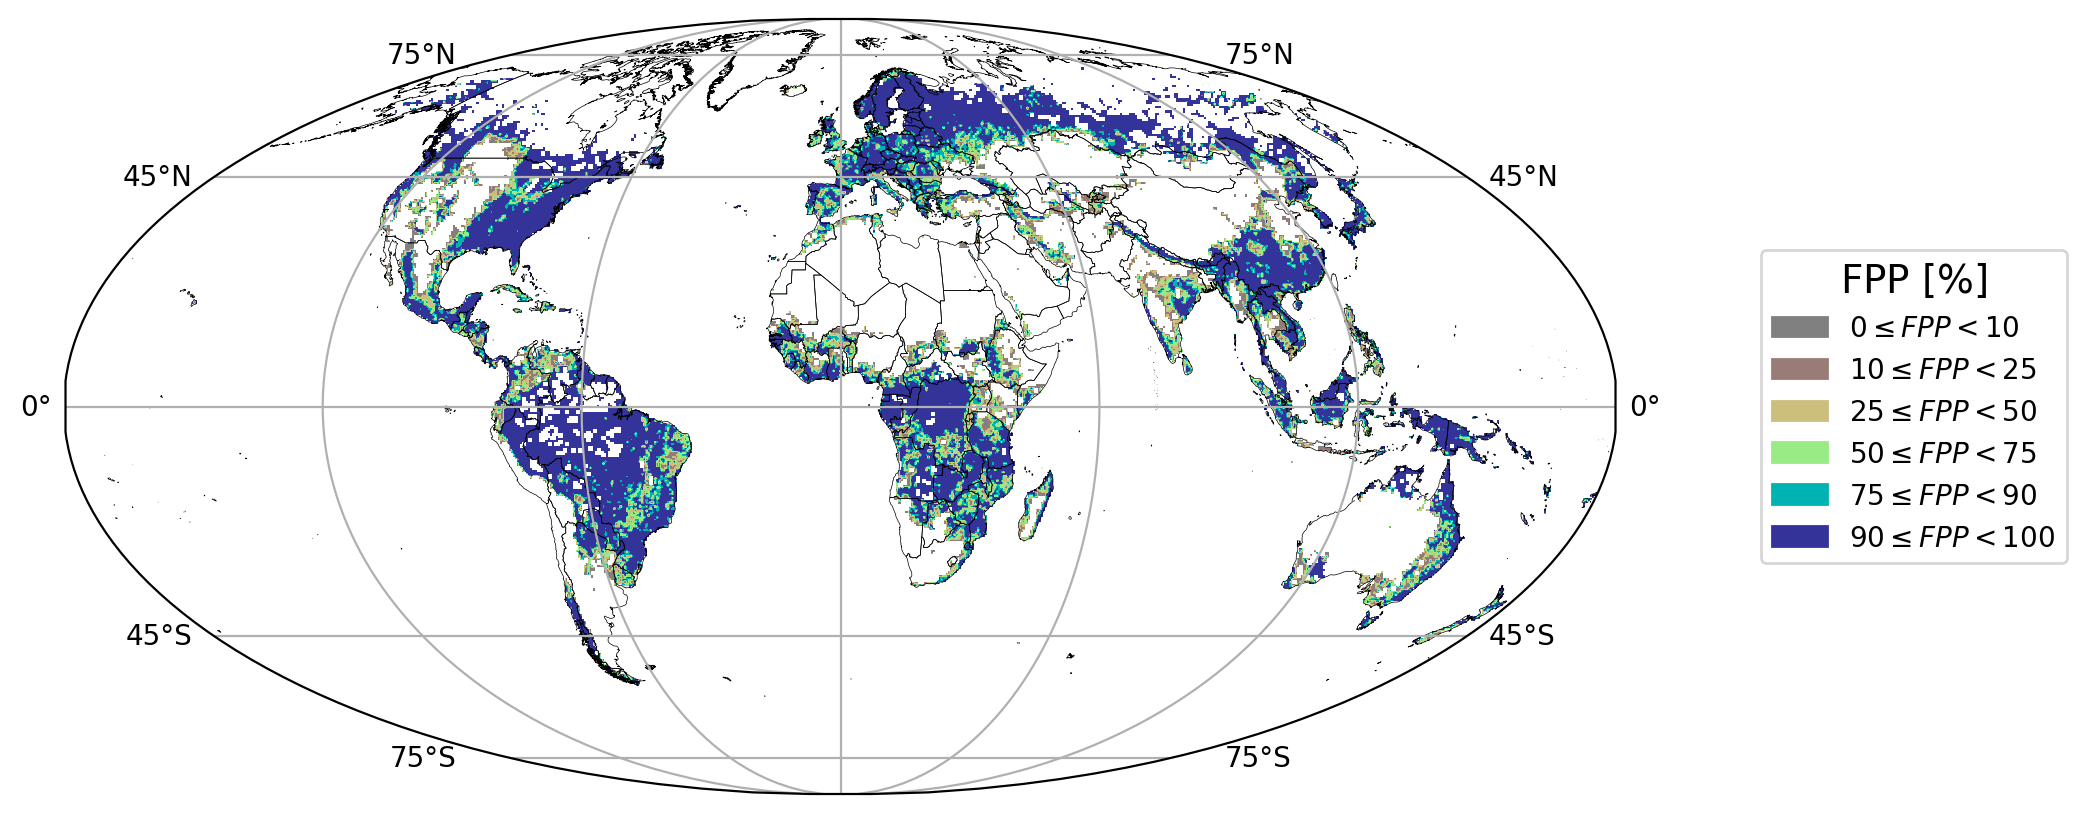

In [7]:
cmap = plt.get_cmap('terrain_r')
n_colors = len(values)-1
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
colors[0] = 'gray'
cmap, ncolors = ListedColormap(colors), len(colors)
norm = BoundaryNorm(values, ncolors=ncolors, clip=True)


# Plot Figure 1A
fig = plt.figure(figsize=(10, 20))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
gdf.boundary.plot(ax=ax, color='black', lw=.25)
plot_data_maps(ax, dataREL, cmap, norm, src)


values_str = values.copy()
legend_patches = [Patch(color=colors[i], label=rf'${values_str[i]} \leq FPP < {values_str[i+1]}$') for i in range(n_colors)]
title = 'FPP ' + r'$[\%]$'
legend = ax.legend(handles=legend_patches, 
                   loc='center right', 
                   bbox_to_anchor=(1.3, 0.5), 
                   title=title, title_fontsize=14)
legend.get_title().set_ha('center')

In [8]:
fout = os.path.join(fhn_dir, 'Figures/FPP_relpop_2020_map.tiff')
fig.savefig(fout, dpi=300, bbox_inches='tight')

# 3. Relative change

In [9]:
year = 1975
PATHL = file_path = os.path.join(fhn_dir, 'Data', 'OUTPUT', 'FPP', 'FPP_{window}_{year}.tif')
file_raster_path = PATHL.format(window=window, year=year)
dataFPP_, src = read_raster(file_raster_path)

PATHL = file_path = os.path.join(fhn_dir, 'Data', 'OUTPUT', 'POP', 'POP_{window}_{year}.tif')
file_raster_path = PATHL.format(window=window, year=year)
dataPOP_, src = read_raster(file_raster_path)

In [10]:
dataREL_ = 100*dataFPP_ / dataPOP_

In [11]:
dataRelDiff = 100*(dataREL - dataREL_) / dataREL_

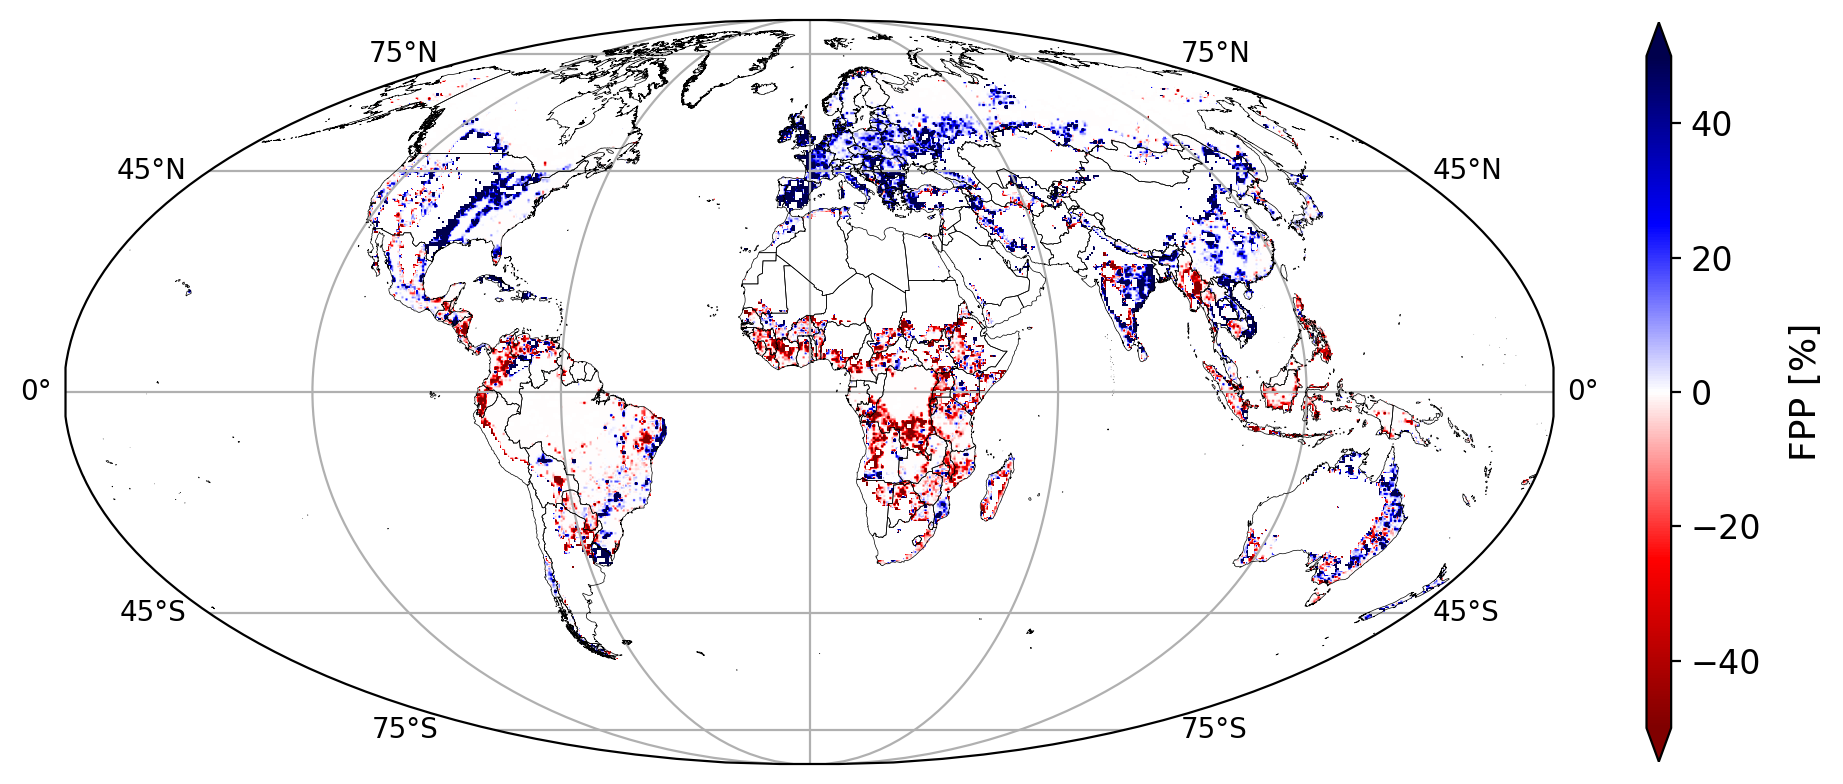

In [14]:
# Plot Figure 1B
vmin, vmax = -50, 50
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
ax.set_extent([-18000000, 18000000, -9000000, 9000000], crs=crsplot)
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.LAND, facecolor='white')
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.ylocator = mticker.FixedLocator([-75, -45, 0, 45, 75])
gl.top_labels = False
gl.bottom_labels = False
gdf.boundary.plot(ax=ax, color='black', lw=.25)
show(dataRelDiff, cmap='seismic_r', vmin=vmin, vmax=vmax, ax=ax, transform=src.transform)

# Add colorbar to Figure 1B
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='seismic_r', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, extend='both', shrink=0.4, aspect=30)
cbar.set_label('FPP [%]', fontsize=13, labelpad=10)
cbar.ax.tick_params(labelsize=12)

In [15]:
fout = os.path.join(fhn_dir, 'Figures/FPP_relpop_diff_map.tiff')
fig.savefig(fout, dpi=300, bbox_inches='tight')